#  Contexte du projet


Vous travaillez pour une entreprise qui commercialise des produits via différents canaux. En tant que data Data Scientist, votre manager souhaite que vous fassiez une analyse détaillée des clients de l'entreprise et de les segmenter. En effet, il souhaite mieux comprendre ses clients afin de leur proposer des produits en fonction leur besoin, leur comportement et leur préoccupation spécifique.

L'analyse de la personnalité du client aide une entreprise à modifier son produit en fonction de ses clients cibles issus de différents types de segments de clientèle. Par exemple, au lieu de dépenser de l'argent pour commercialiser un nouveau produit auprès de chaque client de la base de données de l'entreprise, une entreprise peut analyser quel segment de clientèle est le plus susceptible d'acheter le produit, puis commercialiser le produit uniquement sur ce segment particulier.

#  Description des métadonnées

ID : Identifiant unique du client
Year_Birth : année de naissance du client
éducation : niveau d'éducation du client
Marital_Status : état civil du client
Revenu : Revenu annuel du ménage du client
Kidhome : nombre d'enfants dans le ménage du client
Teenhome : Nombre d'adolescents dans le ménage du client
Dt_Customer : Date d'inscription du client auprès de l'entreprise
Recency : nombre de jours depuis le dernier achat du client
Complain:plainte : 1 si le client s'est plaint au cours des 2 dernières années, 0 sinon


MntWines : Montant dépensé pour le vin au cours des 2 dernières années
MntFruits : Montant dépensé en fruits au cours des 2 dernières années
MntMeatProducts : montant dépensé pour la viande au cours des 2 dernières années
MntFishProducts : montant dépensé pour le poisson au cours des 2 dernières années
MntSweetProducts : montant dépensé en sucreries au cours des 2 dernières années
MntGoldProds : Montant dépensé en or au cours des 2 dernières années


NumDealsPurchases : nombre d'achats effectués avec une remise
AcceptedCmp1 : 1 si le client a accepté l'offre lors de la 1ère campagne, 0 sinon
AcceptedCmp2 : 1 si le client a accepté l'offre lors de la 2ème campagne, 0 sinon
AcceptedCmp3 : 1 si le client a accepté l'offre dans la 3ème campagne, 0 sinon
AcceptedCmp4 : 1 si le client a accepté l'offre lors de la 4ème campagne, 0 sinon
AcceptedCmp5 : 1 si le client a accepté l'offre lors de la 5ème campagne, 0 sinon
Réponse : 1 si le client a accepté l'offre lors de la dernière campagne, 0 sinon


NumWebPurchases : nombre d'achats effectués sur le site Web de l'entreprise
NumCatalogPurchases : Nombre d'achats effectués à  l'aide d'un catalogue
NumStorePurchases : Nombre d'achats effectués directement en magasin
NumWebVisitsMonth : nombre de visites sur le site Web de l'entreprise au cours du dernier mois

# Importation des librairies et du jeu de données

In [1]:
import pandas as pd 

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import RobustScaler

In [8]:
data = pd.read_csv('https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/file/csv/87e3ec06-a99f-42bf-b292-074d02f31a94.csv',delimiter='\t')

In [9]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [11]:
#data=pd.read_csv('segmentation.csv', delimiter='\t')

# Analyse exploratoire des données

In [13]:
data.shape

(2240, 29)

In [ ]:
#visualisation des données manquantes 

In [16]:
(data.isna().sum()/data.shape[0])*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

<AxesSubplot:>

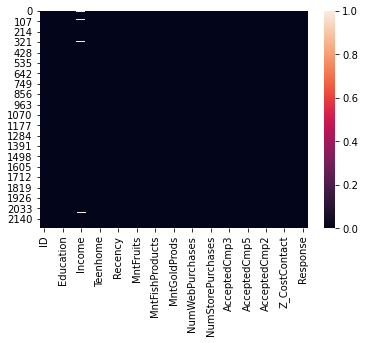

In [31]:
sns.heatmap(data.isna())

In [17]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [19]:
# variables qualitatives

data.select_dtypes(include='object').columns

Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')

In [21]:
# variables quantitatives

data.select_dtypes(include='number').columns


Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

In [23]:
len(data.select_dtypes(include='number').columns)

26

In [22]:
for col in data.select_dtypes('object').columns:
    print(f" frequence par modalités de {col}:\n{data[col].value_counts(normalize=True)*100}\n\n")

 frequence par modalités de Education:
Graduation    50.312500
PhD           21.696429
Master        16.517857
2n Cycle       9.062500
Basic          2.410714
Name: Education, dtype: float64


 frequence par modalités de Marital_Status:
Married     38.571429
Together    25.892857
Single      21.428571
Divorced    10.357143
Widow        3.437500
Alone        0.133929
Absurd       0.089286
YOLO         0.089286
Name: Marital_Status, dtype: float64


 frequence par modalités de Dt_Customer:
31-08-2012    0.535714
14-02-2013    0.491071
12-05-2014    0.491071
12-09-2012    0.491071
20-08-2013    0.446429
                ...   
04-08-2013    0.044643
22-04-2014    0.044643
21-09-2013    0.044643
13-08-2013    0.044643
13-03-2014    0.044643
Name: Dt_Customer, Length: 663, dtype: float64




# Analyse Univariée

In [25]:
#variables quantitatives

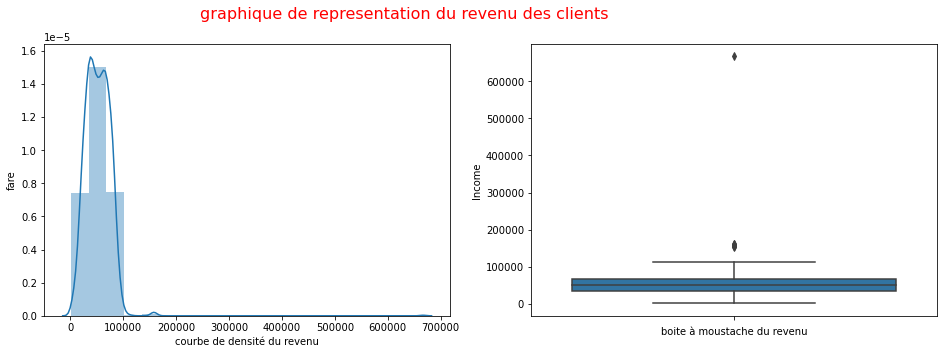

In [30]:
#créer une figure avec 2 Axes sur la même ligne
fig, ax = plt.subplots(1,2,figsize=(16,5))

sns.distplot(data['Income'], bins=20, kde=True,ax=ax[0])
ax[0].set_xlabel('courbe de densité du revenu')
ax[0].set_ylabel('fare')
sns.boxplot(y='Income',data=data, ax=ax[1])
ax[1].set_xlabel('boite à moustache du revenu')
ax[1].set_ylabel('Income')
#ajouter un texte à une figure
fig.text(0.26, 0.95, 'graphique de representation du revenu des clients', fontsize = 16,color='r');

In [34]:
data['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

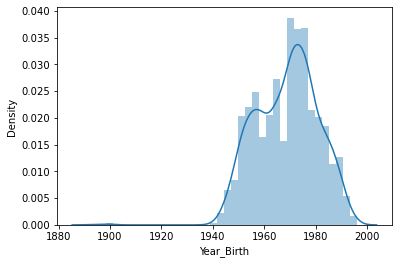

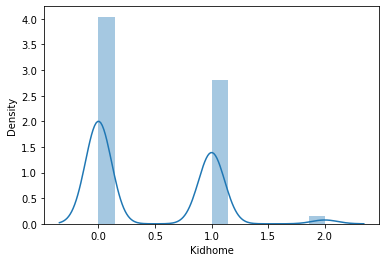

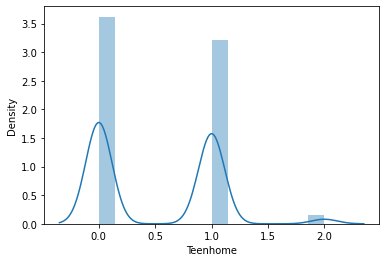

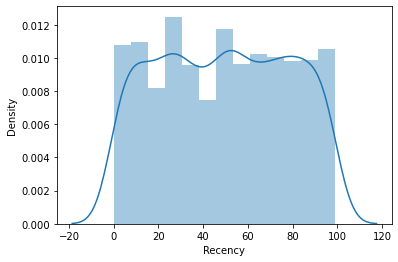

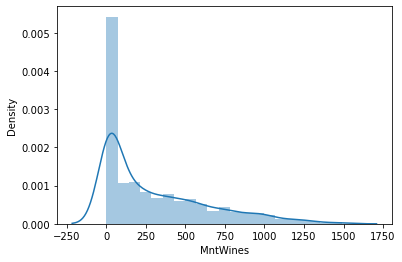

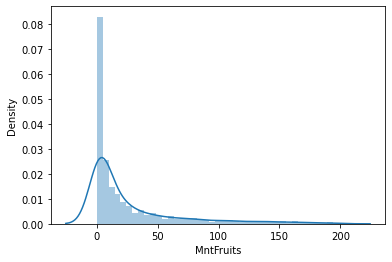

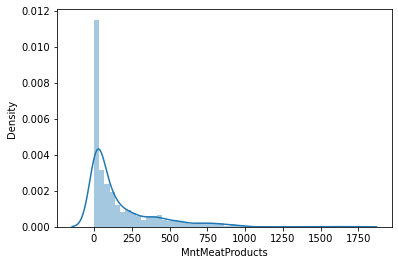

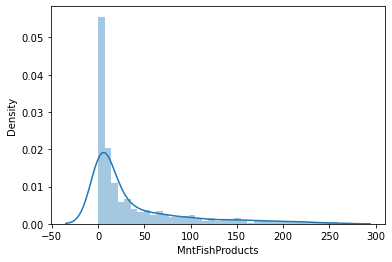

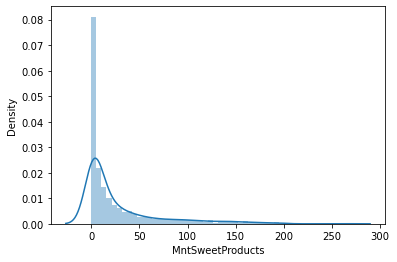

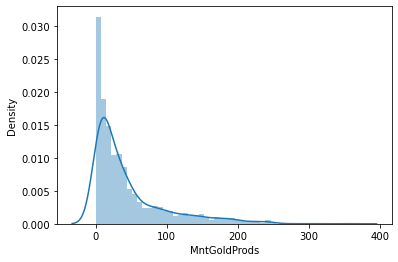

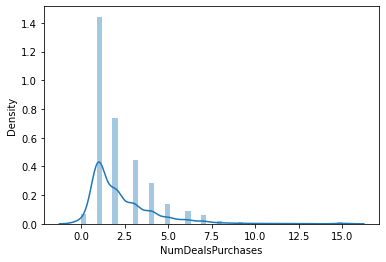

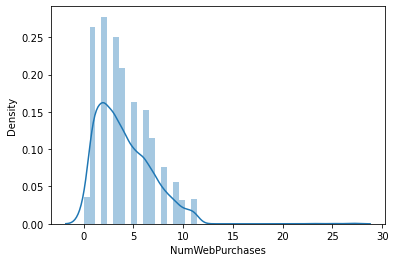

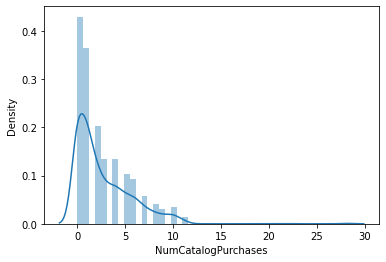

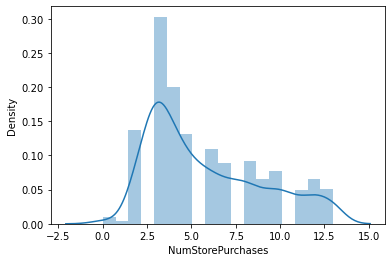

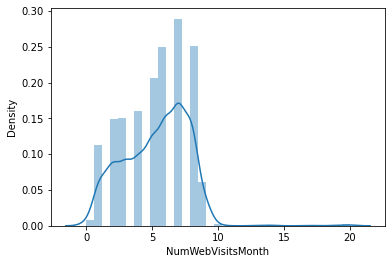

In [39]:
data_quanti=data[['Year_Birth', 'Kidhome', 'Teenhome', 'Recency','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth']]
for col in data_quanti.select_dtypes('number'):
    plt.figure()
    sns.distplot(data_quanti[col])

Text(0, 0.5, 'Year_Birth')

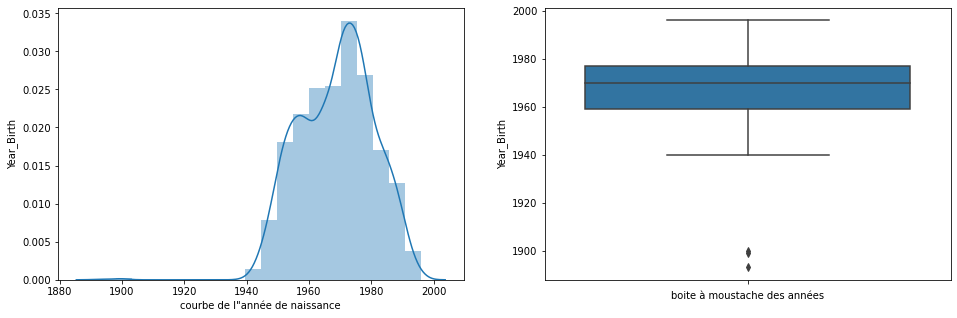

In [42]:
fig, ax = plt.subplots(1,2,figsize=(16,5))

sns.distplot(data['Year_Birth'], bins=20, kde=True,ax=ax[0])
ax[0].set_xlabel('courbe de l"année de naissance')
ax[0].set_ylabel('Year_Birth')
sns.boxplot(y='Year_Birth',data=data, ax=ax[1])
ax[1].set_xlabel('boite à moustache des années')
ax[1].set_ylabel('Year_Birth')

Text(0, 0.5, 'Recency')

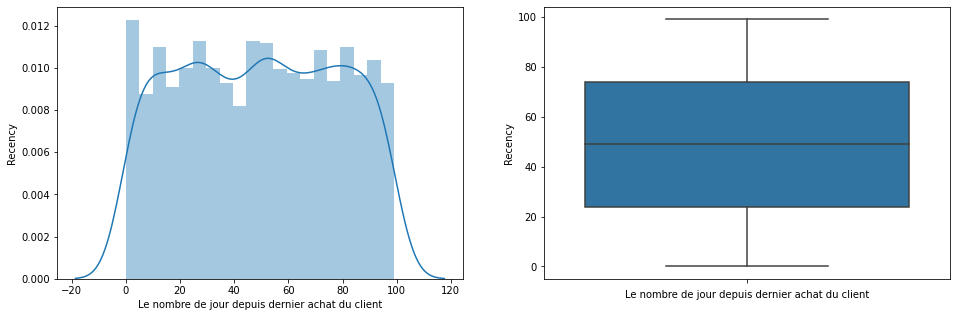

In [44]:
fig, ax = plt.subplots(1,2,figsize=(16,5))

sns.distplot(data['Recency'], bins=20, kde=True,ax=ax[0])
ax[0].set_xlabel('Le nombre de jour depuis dernier achat du client')
ax[0].set_ylabel('Recency')
sns.boxplot(y='Recency',data=data, ax=ax[1])
ax[1].set_xlabel('Le nombre de jour depuis dernier achat du client')
ax[1].set_ylabel('Recency')

In [49]:
def graphBar(variable, couleur, titre):
    ax = data[variable].value_counts().plot(kind='bar', figsize=(18,5),
                                            color=couleur, fontsize=13,);
    ax.set_alpha(0.8)
    ax.set_title(titre, fontsize=18)
    ax.set_ylabel("Nombre d'individus", fontsize=18);
    
    
    # créer une liste pour collecter les données plt.patches
    totals = []

    # trouver les valeurs et ajouter à la liste
    for i in ax.patches:
        totals.append(i.get_height())

    # set individual bar lables using above list
    total = sum(totals)

    # définir des étiquettes de barres individuelles à l'aide de la liste ci-dessus
    for i in ax.patches:
        # get_x tire vers la gauche ou vers la droite ; get_height pousse vers le haut ou vers le bas
        ax.text(i.get_x(), i.get_height()+.5, \
                str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                    color='dimgrey')

def pieBar(variable, couleur, titre):
    fig, ax = plt.subplots(1, 2)
    graphBar(variable, couleur, titre)
    ax[0].pie(data[variable].value_counts(),
    #                labels=['absence', 'presence'],
                   colors = couleur,
    #                explode = [0, 0.05],
               autopct = '%1.2f%%',
               shadow = True)
    ax[0].set_title(titre, fontsize=18)
#     plt.savefig(f'img/{titre}.png')
    plt.show()
    print(120*'=')
from random import sample

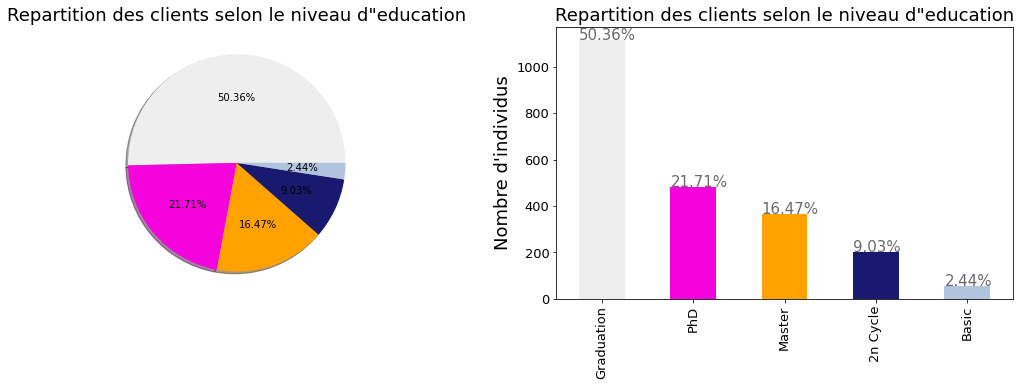

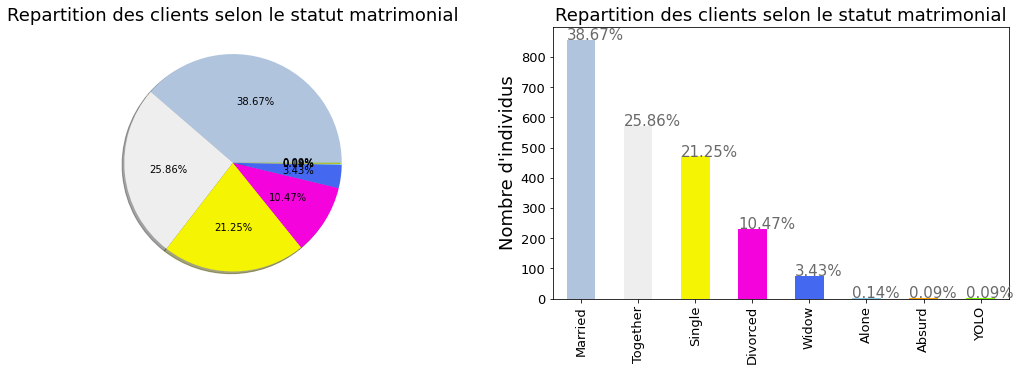

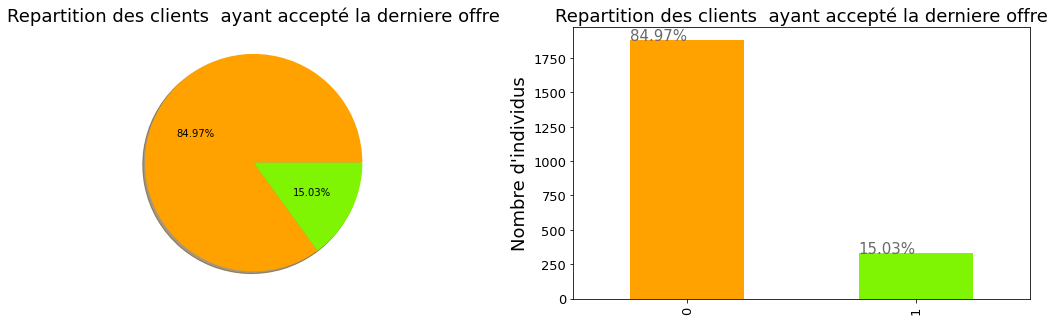

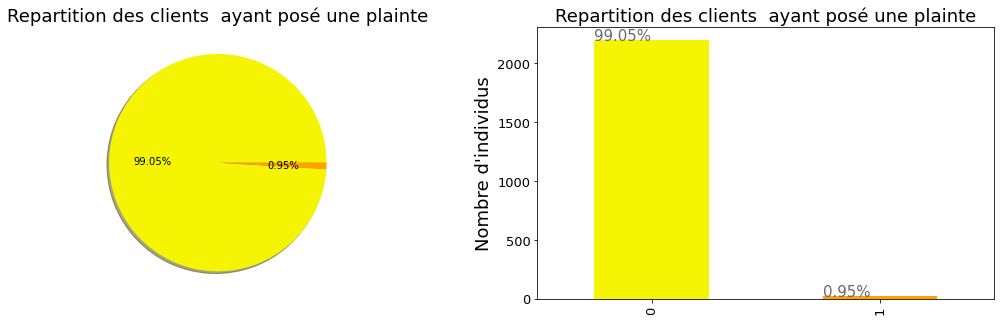

In [56]:
couleurs = ['SkyBlue', '#4568f1', '#f4f403', '#EEEEEE', '#7ff403', '#f403dc', '#ffa200', 'MidnightBlue','LightSteelBlue']

pieBar(variable='Education', couleur=sample(couleurs, k=5), titre='Repartition des clients selon le niveau d"education')
pieBar(variable='Marital_Status', couleur=sample(couleurs, k=8), titre='Repartition des clients selon le statut matrimonial')
pieBar(variable='Response', couleur=sample(couleurs, k=2), titre='Repartition des clients  ayant accepté la derniere offre')
pieBar(variable='Complain', couleur=sample(couleurs, k=2), titre='Repartition des clients  ayant posé une plainte')

# Préprocessing

-  gestion des données manquantes

In [52]:
data.drop('ID', 1, inplace=True)

In [53]:
#suppression des lignes contenant des valeurs manquantes

data.dropna(axis=0,subset=['Income'],inplace=True)


<AxesSubplot:>

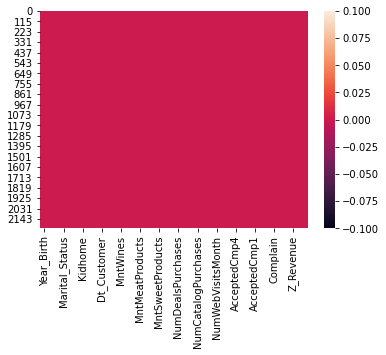

In [54]:
sns.heatmap(data.isna())

In [55]:
(data.isna().sum()/data.shape[0])*100

Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Z_CostContact          0.0
Z_Revenue              0.0
Response               0.0
dtype: float64

- gestion des données aberrantes

In [63]:
def valeurAberante(data):
    percentage = {}
    for col in data.select_dtypes(include='number').columns:
        Q1 = np.quantile(data[col],0.25)
        Q3 = np.quantile(data[col],0.75)
        IIQ = Q3 - Q1
        bornInf = Q1-1.5*IIQ
        bornSup = Q3+1.5*IIQ
        abberantVal = []
        for i in data[col]:
            if bornInf <= i <= bornSup :
                pass
            else:
                abberantVal.append(i)
                percent = len(abberantVal)*100/1718
                percentage[col] = percent
    return percentage

In [64]:
valeurAberante(data)

{'Year_Birth': 0.17462165308498254,
 'Income': 0.46565774155995343,
 'MntWines': 2.0372526193247964,
 'MntFruits': 14.318975552968569,
 'MntMeatProducts': 10.128055878928988,
 'MntFishProducts': 12.922002328288707,
 'MntSweetProducts': 14.318975552968569,
 'MntGoldProds': 11.932479627473807,
 'NumDealsPurchases': 4.889406286379511,
 'NumWebPurchases': 0.17462165308498254,
 'NumCatalogPurchases': 1.3387660069848661,
 'NumWebVisitsMonth': 0.46565774155995343,
 'AcceptedCmp3': 9.487776484284051,
 'AcceptedCmp4': 9.545983701979045,
 'AcceptedCmp5': 9.429569266589057,
 'AcceptedCmp1': 8.265424912689173,
 'AcceptedCmp2': 1.7462165308498254,
 'Complain': 1.2223515715948778,
 'Response': 19.383003492433062}